

## Objective
The objective of this notebook is to combine transactional, user, and restaurant data from different file formats into a single dataset and analyze order trends, user behavior, and revenue patterns.


In [5]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3



In [7]:
#STEP-1 
orders = pd.read_csv(r"C:\Users\anjal\Downloads\orders.csv")
orders.head()


,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name
0,1,2508,450,18-02-2023,842.97,New Foods Chinese
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian


In [9]:
#STEP-2
users = pd.read_json(r"C:\Users\anjal\Downloads\users.json")
users.head()



,user_id,name,city,membership
0,1,User_1,Chennai,Regular
1,2,User_2,Pune,Gold
2,3,User_3,Bangalore,Gold
3,4,User_4,Bangalore,Regular
4,5,User_5,Pune,Gold


In [13]:
#STEP-3
connec = sqlite3.connect(":memory:")

sql_text = open(r"C:\Users\anjal\Downloads\restaurants.sql").read()
connec.executescript(sql_text)

restaurants = pd.read_sql("SELECT * FROM restaurants", connec)
restaurants.head()


,restaurant_id,restaurant_name,cuisine,rating
0,1,Restaurant_1,Chinese,4.8
1,2,Restaurant_2,Indian,4.1
2,3,Restaurant_3,Mexican,4.3
3,4,Restaurant_4,Chinese,4.1
4,5,Restaurant_5,Chinese,4.8


In [14]:
#STEP-4
final_df = orders.merge(
    users,
    how="left",
    on="user_id"
).merge(
    restaurants,
    how="left",
    on="restaurant_id"
)

final_df.head()


,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name_x,name,city,membership,restaurant_name_y,cuisine,rating
0,1,2508,450,18-02-2023,842.97,New Foods Chinese,User_2508,Hyderabad,Regular,Restaurant_450,Mexican,3.2
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine,User_2693,Pune,Regular,Restaurant_309,Indian,4.5
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi,User_2084,Chennai,Gold,Restaurant_107,Mexican,4.0
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg,User_319,Bangalore,Gold,Restaurant_224,Chinese,4.8
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian,User_1064,Pune,Regular,Restaurant_293,Italian,3.0


In [15]:
#STEP-5
final_df.to_csv("final_food_delivery_dataset.csv", index=False)


## Analysis

C:\Users\anjal\AppData\Local\Temp\ipykernel_11364\1232763052.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  final_df["order_date"] = pd.to_datetime(final_df["order_date"])


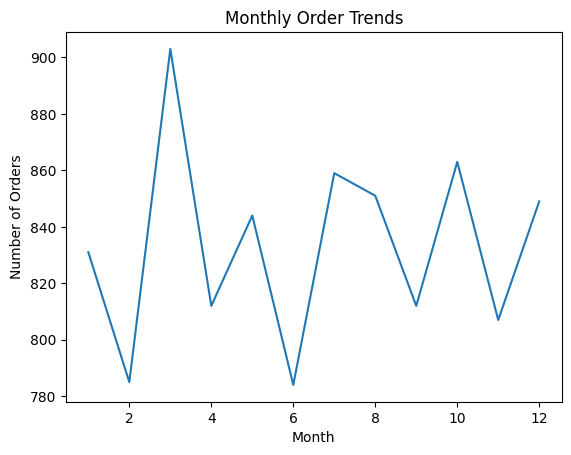

In [16]:
# 1.Order Trends Over Time
final_df["order_date"] = pd.to_datetime(final_df["order_date"])

orders_by_month = final_df.groupby(final_df["order_date"].dt.month)["order_id"].count()

orders_by_month.plot(kind="line")
plt.title("Monthly Order Trends")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.show()


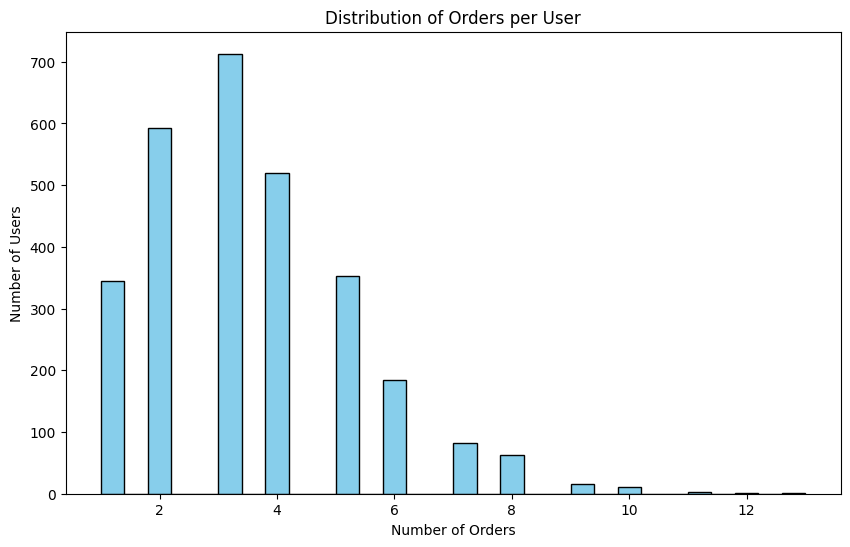

In [49]:
# 2. User Behavior Patterns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
orders_per_user.plot(kind='hist', bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Orders per User")
plt.xlabel("Number of Orders")
plt.ylabel("Number of Users")
plt.show()



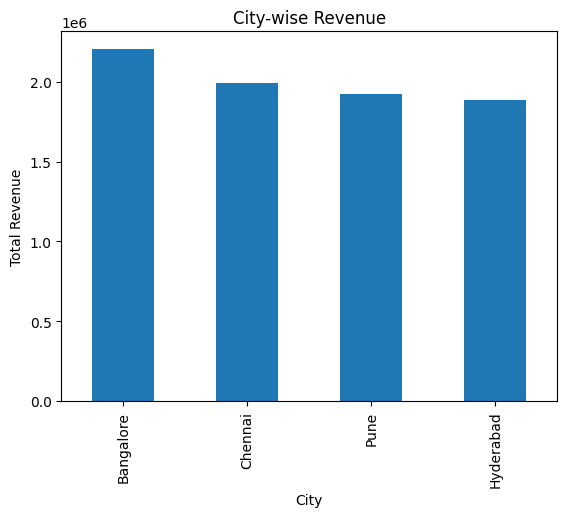

In [18]:
# 3. City-wise Revenue Performance
city_revenue = final_df.groupby("city")["total_amount"].sum().sort_values(ascending=False)

city_revenue.plot(kind="bar")
plt.title("City-wise Revenue")
plt.xlabel("City")
plt.ylabel("Total Revenue")
plt.show()


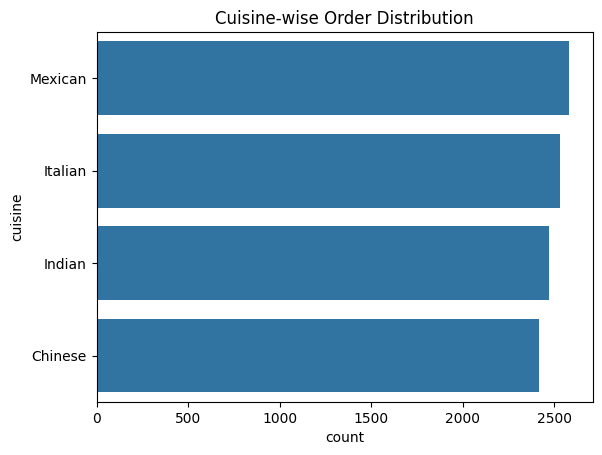

In [19]:
# 4. Cuisine-wise Performance
sns.countplot(
    data=final_df,
    y="cuisine",
    order=final_df["cuisine"].value_counts().index
)
plt.title("Cuisine-wise Order Distribution")
plt.show()


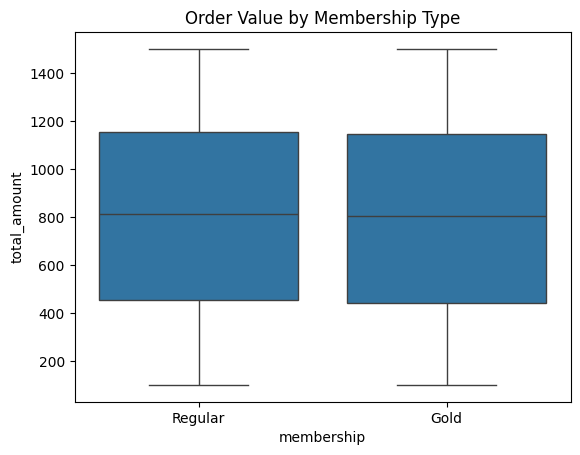

In [20]:
# 5. Membership Impact
sns.boxplot(
    data=final_df,
    x="membership",
    y="total_amount"
)
plt.title("Order Value by Membership Type")
plt.show()


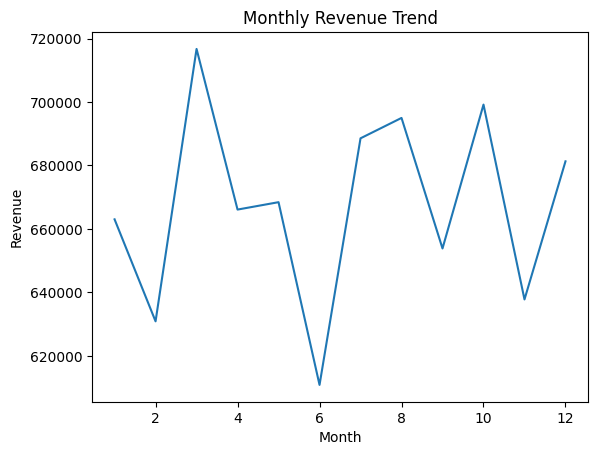

In [21]:
# 6. Revenue Distribution & Seasonality
monthly_revenue = final_df.groupby(final_df["order_date"].dt.month)["total_amount"].sum()

monthly_revenue.plot(kind="line")
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()


## QUESTIONS:

In [23]:
#City with highest revenue from Gold members
gold_city = final_df[final_df["membership"]=="Gold"] \
    .groupby("city")["total_amount"].sum().idxmax()
gold_city


'Chennai'

In [24]:
#Cuisine with highest average order value
top_cuisine = final_df.groupby("cuisine")["total_amount"].mean().idxmax()
top_cuisine

'Mexican'

In [25]:
#Distinct users with total spend > ₹1000
user_total = final_df.groupby("user_id")["total_amount"].sum()
(user_total > 1000).sum()

np.int64(2544)

In [27]:
#Rating range with highest total revenue
final_df["rating_range"] = pd.cut(final_df["rating"],
                                  bins=[3.0, 3.5, 4.0, 4.5, 5.0],
                                  labels=["3.0–3.5","3.6–4.0","4.1–4.5","4.6–5.0"])
final_df.groupby("rating_range")["total_amount"].sum().idxmax()

C:\Users\anjal\AppData\Local\Temp\ipykernel_11364\2337202262.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  final_df.groupby("rating_range")["total_amount"].sum().idxmax()


'4.6–5.0'

In [28]:
#Among Gold members, city with highest average order value
final_df[final_df["membership"]=="Gold"] \
    .groupby("city")["total_amount"].mean().idxmax()

'Chennai'

In [42]:
#Cuisine with lowest restaurants but significant revenue
restaurant_count = restaurants.groupby("cuisine")["restaurant_id"].nunique()
cuisine_revenue = final_df.groupby("cuisine")["total_amount"].sum()

combined = pd.concat([restaurant_count, cuisine_revenue], axis=1)
combined.columns = ["restaurant_count", "revenue"]

min_restaurants = combined["restaurant_count"].min()

result = combined[combined["restaurant_count"] == min_restaurants] \
            .sort_values("revenue", ascending=False)

result


,restaurant_count,revenue
cuisine,,
Chinese,120,1930504.65


In [30]:
#Percentage of orders by Gold members
round((final_df["membership"]=="Gold").mean()*100)

50

In [44]:
#Restaurant with highest avg order value but < 20 orders
rest_stats = final_df.groupby("restaurant_name_x").agg(
    avg_order_value=("total_amount", "mean"),
    total_orders=("order_id", "count")
)

rest_stats[rest_stats["total_orders"] < 20] \
    .sort_values("avg_order_value", ascending=False) \
    .head(1)


,avg_order_value,total_orders
restaurant_name_x,,
Hotel Dhaba Multicuisine,1040.222308,13


#Restaurant with highest avg order value but < 20 orders
answer of this question is none of these because correct option is not in the options given.

In [46]:
# Combination (Membership + Cuisine) with highest revenue
final_df.groupby(["membership", "cuisine"])["total_amount"].sum().sort_values(ascending=False).head()


membership  cuisine
Regular     Mexican    1072943.30
            Italian    1018424.75
Gold        Mexican    1012559.79
            Italian    1005779.05
Regular     Indian      992100.27
Name: total_amount, dtype: float64

In [48]:
# Quarter with highest revenue
# Quarter with highest revenue
final_df['order_date'] = pd.to_datetime(final_df['order_date'])
final_df.groupby(final_df['order_date'].dt.quarter)['total_amount'].sum().sort_values(ascending=False).head(1)



order_date
3    2037385.1
Name: total_amount, dtype: float64

## Numerical Questions

In [35]:
# Total orders by Gold members
(final_df["membership"]=="Gold").sum()

np.int64(4987)

In [36]:
# Total revenue from Hyderabad
round(final_df[final_df["city"]=="Hyderabad"]["total_amount"].sum())

1889367

In [37]:
# Distinct users
final_df["user_id"].nunique()

2883

In [38]:
# Average order value for Gold members
round(final_df[final_df["membership"]=="Gold"]["total_amount"].mean(),2)

np.float64(797.15)

In [39]:
# Orders with rating >= 4.5
(final_df["rating"]>=4.5).sum()

np.int64(3374)

In [40]:
# Orders in top Gold city
top_gold_city = final_df[final_df["membership"]=="Gold"].groupby("city")["total_amount"].sum().idxmax()
final_df[(final_df["membership"]=="Gold") & (final_df["city"]==top_gold_city)].shape[0]

1337

## FILL IN THE BLANKS

In [41]:
#Total rows in final dataset:
len(final_df)

10000